# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [190]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [191]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

# Import Data

In [192]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)

In [193]:
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


In [194]:
sfo_data.head(10)

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239
2010,Central Sunset,418.172493,372560,1239
2010,Corona Heights,369.359338,372560,1239
2010,Cow Hollow,569.379968,372560,1239
2010,Croker Amazon,165.645730,372560,1239


In [195]:
df_house_units = sfo_data['housing_units'].groupby(sfo_data.index).mean()

In [196]:
df_house_units

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [200]:
# Define Panel Visualization Functions

#def housing_units_per_year():
housing_units = (
    sfo_data.groupby("year")["housing_units"].mean() )

def housing_units_year():
    figure_house_units = plt.figure()
    plot_house_units = housing_units.plot.bar()
    plot_house_units.set_xlabel('Year')
    plot_house_units.set_ylabel('House Units')
    plot_house_units.set_title('AVG HOUSING UNITS', fontsize=14, fontweight='bold')
    plt.close(figure_house_units)
    return pn.pane.Matplotlib(figure_house_units)

#def average_gross_rent():
avg_rent = (sfo_data.groupby('year')['gross_rent'].mean() )

def average_gross_rent():
    figure_avg_rent= plt.figure()
    plot_avg_rent= avg_rent.plot()
    plot_avg_rent.set_xlabel('Year')
    plot_avg_rent.set_ylabel('$')
    plot_avg_rent.set_title('AVG RENT', fontsize=14, fontweight='bold')
    plt.close(figure_avg_rent)
    return pn.pane.Matplotlib(figure_avg_rent)
    
#def average_sales_price():
average_sales_prices = sfo_data.groupby('year')['sale_price_sqr_foot'].mean()

def average_sales_price():
    figure_average_sales_prices = plt.figure()
    plot_average_sales_prices= average_sales_prices.plot()
    plot_average_sales_prices.set_xlabel('Year')
    plot_average_sales_prices.set_ylabel('$')
    plot_average_sales_prices.set_title('AVG SALES PRICE', fontsize=14, fontweight='bold')
    plt.close(figure_average_sales_prices)
    return pn.pane.Matplotlib(figure_average_sales_prices)

#def average_price_by_neighborhood():
df_total_costs = sfo_data.groupby([sfo_data.index, 'neighborhood']).mean()
df_total_costs.reset_index(inplace = True)

def average_price_neighborhood():
    average_price_neighborhood = df_total_costs.hvplot('year', 'sale_price_sqr_foot', groupby='neighborhood')
    return average_price_neighborhood


#def top_most_expensive_neighborhoods():
avg_value = sfo_data.groupby([sfo_data["neighborhood"]]).mean()
most_expensive = avg_value.sort_values(by="sale_price_sqr_foot", ascending=False).head(10)
most_expensive = most_expensive.reset_index()

def most_expensive_neighborhood():
    m_e_n = most_expensive.iloc[0:10].hvplot.bar(x="neighborhood", y="sale_price_sqr_foot", title="SanFran Top 10", height=500, rot=45)
    return m_e_n

#def parallel_coordinates():
most_expensive.columns
top = most_expensive.iloc[0:10]

def para_coord():
    par_coord = px.parallel_coordinates(top, color = 'sale_price_sqr_foot')
    return par_coord
    
    
#def parallel_categories():
def para_cats():
    par_cat = px.parallel_categories(
        top,
        dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
        color="sale_price_sqr_foot",
        color_continuous_scale=px.colors.sequential.Inferno,)
    return par_cat

#def Neighborhood Maps():
df_neighborhood_values = df_total_costs
SF_neighborhods_df = pd.concat([df_total_costs,df_neighborhood_locations, ], axis = 'columns', join = 'inner')
px.set_mapbox_access_token(mapbox_token)
data_to_plot = SF_neighborhods_df[["Neighborhood", "Lat", "Lon", "sale_price_sqr_foot", "housing_units", "gross_rent"]]

def sfo_map():
    san_map =px.scatter_mapbox(
        data_to_plot,
        lat="Lat",
        lon="Lon",
        size= "sale_price_sqr_foot", 
        color= "Neighborhood",
        zoom=4)
    return san_map



Tabs
    [0] Matplotlib(Figure)
    [1] Matplotlib(Figure)
    [2] Matplotlib(Figure)
    [3] Row(name='Avg Price Neighborhood')
        [0] HoloViews(DynamicMap, name='Avg Price Neighborhood')
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
            [1] VSpacer()
    [4] HoloViews(Bars, name='Most Expensve N...)
    [5] Plotly(Figure, name='Parallel Coordinates')
    [6] Plotly(Figure, name='Parallel Categories')
    [7] Plotly(Figure, name='SFO Map')
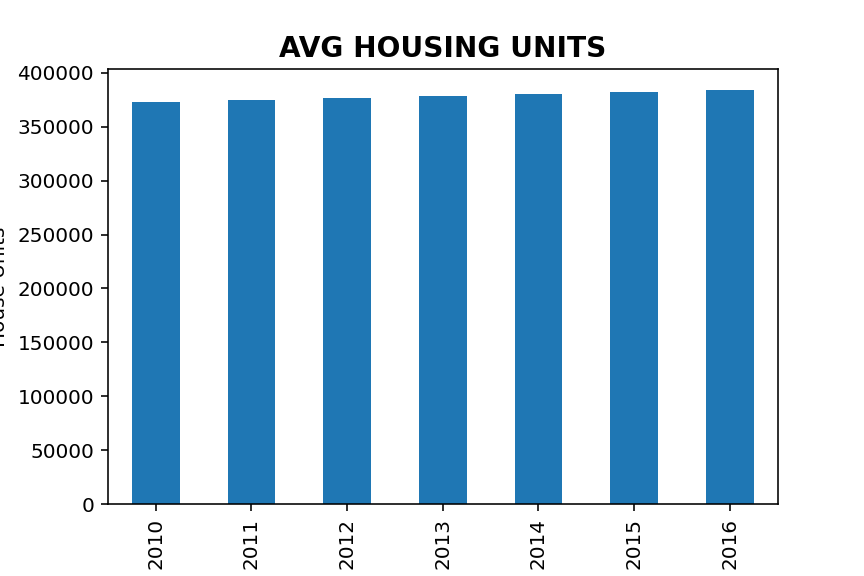
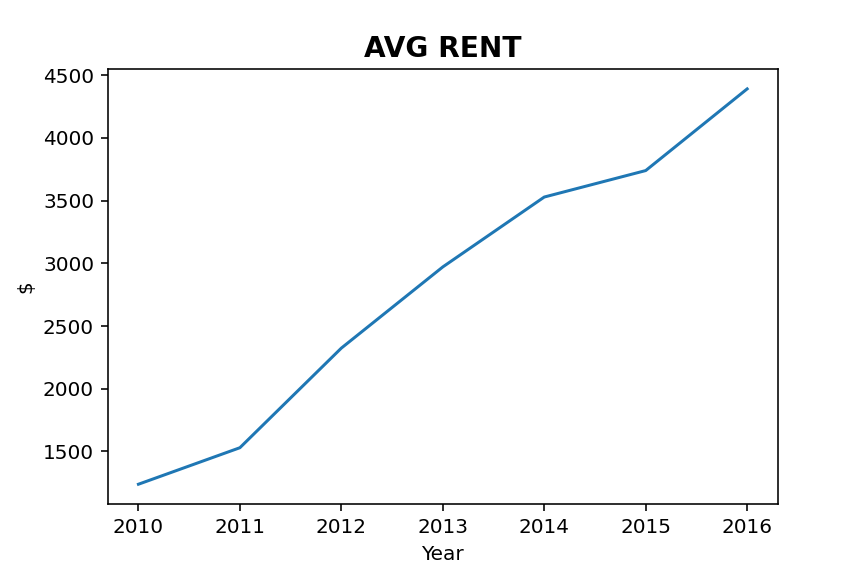
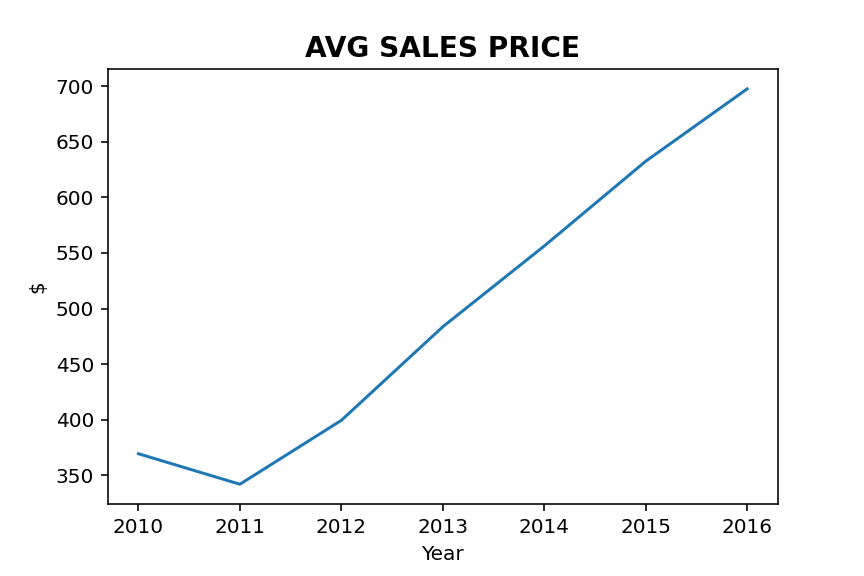

In [201]:
# YOUR CODE HERE!
title = pn.pane.Markdown("SFO HOUSE ANALYSIS", width=100000)

tabs = pn.Tabs(
    ("House Units",housing_units_year()),
    ("Avg Rent",average_gross_rent()),
    ("Avg Price", average_sales_price()),
    ("Avg Price Neighborhood", average_price_neighborhood()),
    ("Most Expensve Neighborhoods", most_expensive_neighborhood()),
    ("Parallel Coordinates", para_coord()),
    ("Parallel Categories", para_cats()),
    ("SFO Map", sfo_map())
)
               
tabs


## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [202]:
dashboard = pn.Column(pn.Row(title), tabs, width=1000)

## Serve the Panel Dashboard

Column(width=1000)
    [0] Row
        [0] Markdown(str, width=100000)
    [1] Tabs
        [0] Matplotlib(Figure)
        [1] Matplotlib(Figure)
        [2] Matplotlib(Figure)
        [3] Row(name='Avg Price Neighborhood')
            [0] HoloViews(DynamicMap, name='Avg Price Neighborhood')
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
        [4] HoloViews(Bars, name='Most Expensve N...)
        [5] Plotly(Figure, name='Parallel Coordinates')
        [6] Plotly(Figure, name='Parallel Categories')
        [7] Plotly(Figure, name='SFO Map')
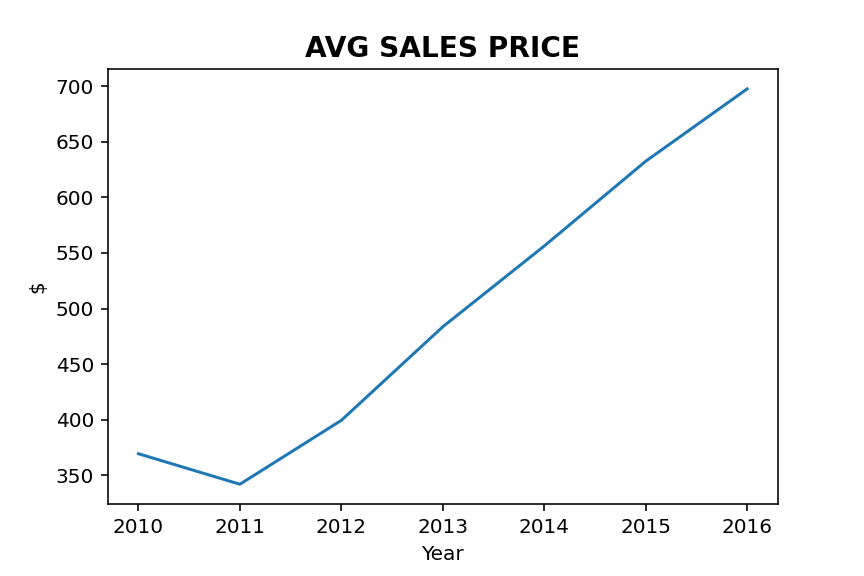
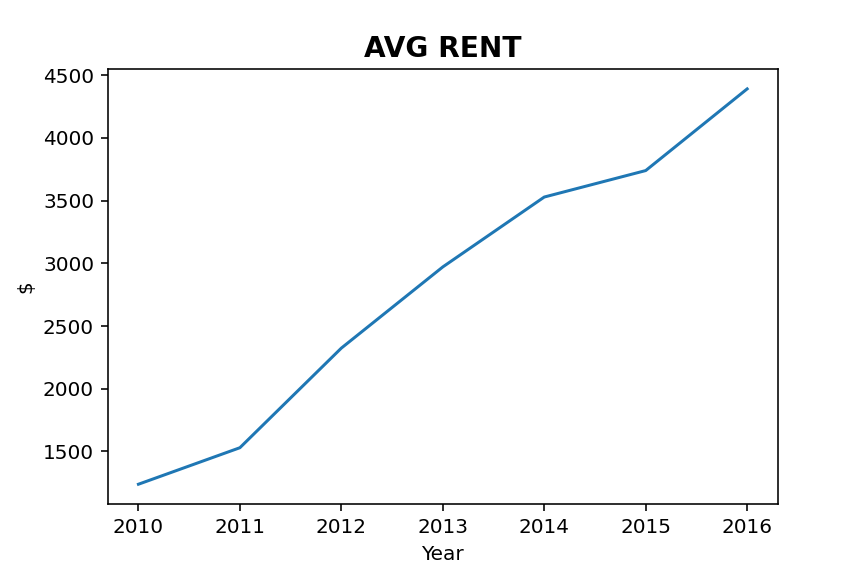
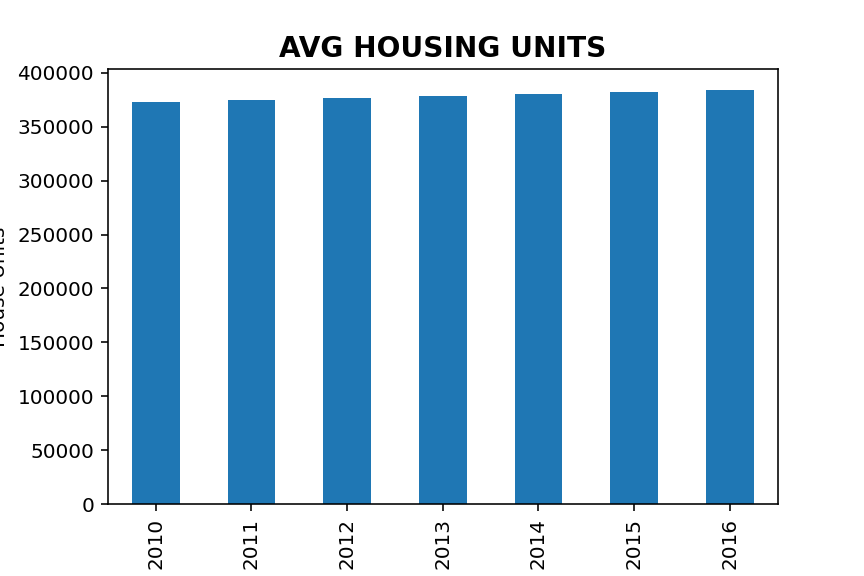

In [203]:
dashboard.servable()